# Does income over 50K contribute to gain more capital compared to income less than 50K? 

## Import library and csv file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
data['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

Original dataset tells around 24% of obervation receives income over 50K.

## Explore Data

Variable 'age' could be an useful feature, so I am going to create new varaible: AgeGroup.

In [3]:
# create a list of our conditions
conditions = [
    (data['age'] <= 19),
    (data['age'] > 19) & (data['age'] <= 29),
    (data['age'] > 29) & (data['age'] <= 39),
    (data['age'] > 39) & (data['age'] <= 49),
    (data['age'] > 49) & (data['age'] <= 59),
    (data['age'] > 59) & (data['age'] <= 69),
    (data['age'] > 69) & (data['age'] <= 79),
    (data['age'] > 79) & (data['age'] <= 89),
    (data['age'] > 89)
    ]

# create a list of the values we want to assign for each condition
values = ['17-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', 'Over 89']

# create a new column and use np.select to assign values to it using our lists as arguments
data['AgeGroup'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,AgeGroup
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,20-29
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,30-39
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,20-29
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,40-49
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,17-19


<AxesSubplot:xlabel='AgeGroup'>

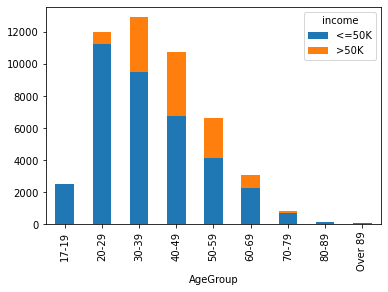

In [7]:
pd.crosstab(data['AgeGroup'], data['income']).plot(kind='bar', stacked=True)

Stacked bar chart shows age group between 30 to 59 relatively has high chance of getting >50K income. In addition, these age group has fairly distributed two income values. It could be a valid resource when we draw the slope plot to see the difference of capital-gain. 

<AxesSubplot:xlabel='race'>

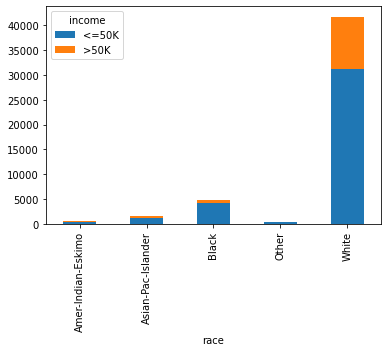

In [9]:
pd.crosstab(data['race'], data['income']).plot(kind='bar', stacked=True)

White race has relatively high chance of getting >50K income.

<AxesSubplot:xlabel='gender'>

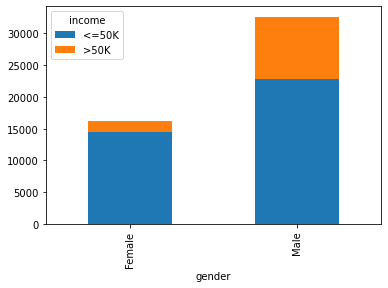

In [10]:
pd.crosstab(data['gender'], data['income']).plot(kind='bar', stacked=True)

Male has relatively high chance of getting >50K income.

<AxesSubplot:xlabel='marital-status'>

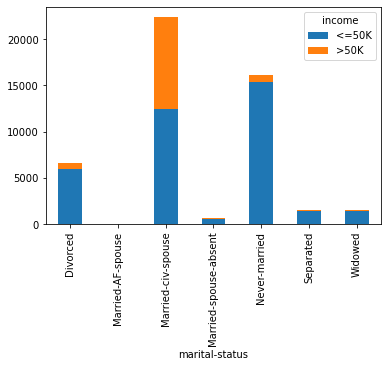

In [12]:
pd.crosstab(data['marital-status'], data['income']).plot(kind='bar', stacked=True)

Married civilian spouse has relatively high chance of getting >50K income.

## Inferential Statistics

I am going to run t-test to figure out relationship between two variables: 'capital-gain' and 'income'.
1. Null hypothesis: income over 50K has more capital-gain compared to income less than 50K.
2. Alternative hypothesis: income less than 50K has more capital-gain.

In [48]:
x0 = data['capital-gain'][data['income'] == ">50K"]
x1 = data['capital-gain'][data['income'] == "<=50K"]
n0 = len(x0)
n1 = len(x1)
n0, n1

(11687, 37155)

In [49]:
from scipy.stats import t

xbar0 = np.mean(x0)
xbar1 = np.mean(x1)
s0 = np.std(x0, ddof=1)
s1 = np.std(x1, ddof=1)
sp = np.sqrt( ((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / ( n0 + n1 - 2) )
t_stat = ( xbar0 - xbar1 ) / ( sp * np.sqrt( 1/n0 + 1/n1 ) )

total_dof = n0 + n1 - 2
p_value = 2 * t.cdf(t_stat, df=total_dof)
print(f"t-statistic is {t_stat}.")
print(f"p_value is {p_value}.")
print("Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.")

t-statistic is 50.55866959191333.
p_value is 2.0.
Since p-value is greater than 0.05, we accept the null hypothesis. We can say null hypothesis is true.


This result shows that income over 50K has more capital-gain compared to income less than 50K.

## Slope Plot: capital-gain by income

[Text(0.5, 1.0, 'Married-civ-spouse')]

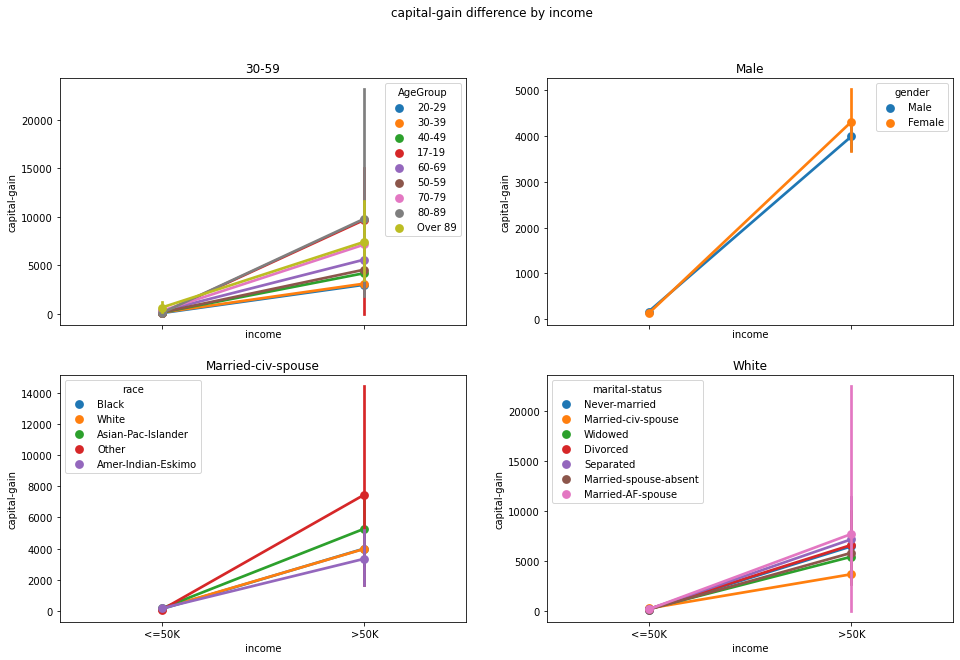

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,10))
fig.suptitle('capital-gain difference by income')

sns.pointplot(ax=axes[0, 0], x='income',y='capital-gain',data=data,hue="AgeGroup").set(title='30-59')
sns.pointplot(ax=axes[0, 1], x='income',y='capital-gain',data=data,hue="gender").set(title='Male')
sns.pointplot(ax=axes[1, 1], x='income',y='capital-gain',data=data,hue="marital-status").set(title='White')
sns.pointplot(ax=axes[1, 0], x='income',y='capital-gain',data=data,hue="race").set(title='Married-civ-spouse')

As you can see the above slope plot, capital-gain increases when income over 50K. 

## Slope Plot: capital-loss by income

[Text(0.5, 1.0, 'Group by Marital Status')]

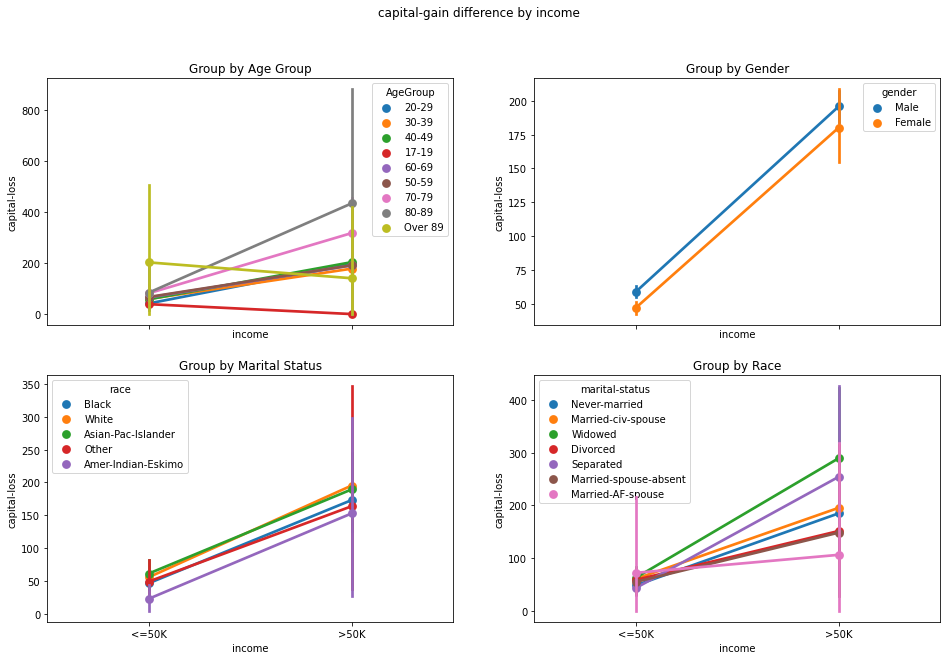

In [79]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,10))
fig.suptitle('capital-gain difference by income')

sns.pointplot(ax=axes[0, 0], x='income',y='capital-loss',data=data,hue="AgeGroup").set(title='Group by Age Group')
sns.pointplot(ax=axes[0, 1], x='income',y='capital-loss',data=data,hue="gender").set(title='Group by Gender')
sns.pointplot(ax=axes[1, 1], x='income',y='capital-loss',data=data,hue="marital-status").set(title='Group by Race')
sns.pointplot(ax=axes[1, 0], x='income',y='capital-loss',data=data,hue="race").set(title='Group by Marital Status')

It shows that income over 50K also tends to have more capital-loss than income less than 50K, except the age group of teenager and over 89. But, we can ignore age group teenager and over 89 because they doesn't have enough income over 50 obervations.

## Conclusion

Observations with income over 50K tend to earn more capital than income less than 50K. However, income over 50K also tends to lose more capital compared to the income less than 50K.